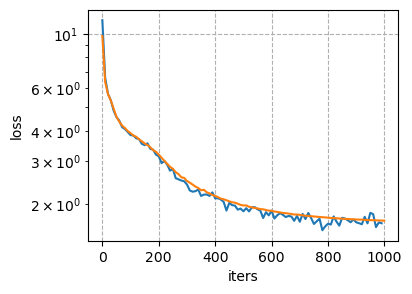

In [1]:
import matplotlib.pyplot as plt

# Read the training log file and extract the data
train_iters = []
train_loss = []
with open('log/train_log.txt', 'r') as file:
  next(file) # Skip the header line    
  for i1, line in enumerate(file):
    # Split the line by '|' and strip whitespace
    parts = [part.strip() for part in line.split('|')]
    # Check if we have enough parts and the first part can be converted to int
    try:
      iter = int(parts[0])
      loss = float(parts[1])
      train_iters.append(iter)
      train_loss.append(loss)
    except (ValueError, IndexError):
      continue

val_iters = []
val_loss = []
with open('log/val_log.txt', 'r') as file:
  next(file) # Skip the header line    
  for line in file:
    # Split the line by '|' and strip whitespace
    parts = [part.strip() for part in line.split('|')]
    # Check if we have enough parts and the first part can be converted to int
    try:
      iter = int(parts[0])
      loss = float(parts[1])
      val_iters.append(iter)
      val_loss.append(loss)
    except (ValueError, IndexError):
      continue

# Create the plot
plt.figure(figsize=(4, 3))
plt.semilogy(train_iters, train_loss)
plt.semilogy(val_iters, val_loss)

# Add labels and title
plt.xlabel('iters')
plt.ylabel('loss')

# Add grid
plt.grid(True, linestyle='--')

# Display the plot
plt.show()

In [ ]:
from dataclasses import dataclass
from gpt import GPT
import torch
from transformers import AutoTokenizer

@dataclass
class GPTConfig:
  block_size: int = 2048
  vocab_size: int = 50257
  n_layer: int = 12
  n_head: int = 12
  n_embd: int = 768

# autodetect GPU
device = "cpu"
if torch.cuda.is_available():
  device = "cuda"
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
  device = "mps"
print(f"using {device}")
checkpoint = torch.load("log/checkpoint_00999.pt", map_location=torch.device(device), weights_only=False)

model = GPT(checkpoint["model_config"])
model.to(device)
model = torch.compile(model)
model.load_state_dict(checkpoint["model_state"])
model.eval()

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-125M")
prompt = torch.tensor([[tokenizer.eos_token_id]], dtype=torch.long).to(device)
print(tokenizer.decode(model.generate(prompt, max_new_tokens=200)[0].tolist()))

using mps
<|endoftext|>Once upon a time, in a beautiful green garden, there lived a bird named Blue and a cat named Jerry. Blue liked to fly, and they had a fun adventure together. One sunny day, Red asked his friend, a rabbit named Pepper, "Can you teach me to dance too?"

Zqueaky replied, "I can teach you how to dance!" They played together and danced around the garden. They had so much fun with the pretty colors on the party.

As the sun began to set, Blue said to Mo, "Let's do it again!" They both nodded and agreed. The colors enjoyed the beautiful day, and they were happy to be together. Tiny and Pepper became the best of friends, and they always cheered and ate on the sour land.<|endoftext|>Once upon a time, there was a little bird named Ellie. She loved to sing. One day, she went to the park to sing a song. She saw a mischievous squirrel who wanted
